In [1]:
%matplotlib inline
import intake
from intake import open_catalog

For Parquet files, since they are a more compressed version of CSV files and thanks to pandas, we can use the same YAML file as we used for local CSVs. Pandas allows us the ability to convert CSV files to Parquet files using a simple command line. We are also still able to call on our catalog to read in the CSV files and convert them to Parquet files. After creating the Parquet Files, we can then create a new YAML file that can include the Parquet files in a new catalog.

In [2]:
catalog = intake.open_catalog('local_csv.yml') #reading in new YAML file with updated data
print(list(catalog))

['la_county', 'county_fuel', 'alternative_fuel', 'la_city', 'walkability']


Now I can create dataframes for my four sources of data. 

In [3]:
df1 = catalog.la_county
county_bound = catalog.la_county.read()

In [4]:
df2 = catalog.county_fuel
county_fuel = catalog.county_fuel.read()

In [5]:
df3 = catalog.alternative_fuel
alternative = catalog.alternative_fuel.read()

In [6]:
d4 = catalog.la_city
city = catalog.la_city.read()

In [7]:
df5 = catalog.walkability
walk = catalog.walkability.read()

These dataframes allow me to use pandas "to_parquet" to convert the csv files into parquet files. Since Parquet files aren't necessarily commonly accessible, converting from CSVs using pandas is a quick and efficient way to utilize the Parquet file format.

In [8]:
import pandas as pd
county_bound.to_parquet('county_boundary.parquet')
county_fuel.to_parquet('county_fueling_stations.parquet')
alternative.to_parquet('alternative_fueling_stations.parquet')
city.to_parquet('city_boundary.parquet')
walk.to_parquet('Walkability_Index_Score_2012.parquet')

Having created my parquet files from the CSVs, I can now create a new YAML file. I will then import this new YAML file to create a new catalog. From this catalog I can call upon the different Parquet files and continue with my analysis.

In [9]:
catalog1 = intake.open_catalog('parquet.yml') #reading in new YAML file with updated data
print(list(catalog))

['la_county', 'county_fuel', 'alternative_fuel', 'la_city', 'walkability']


Again, I will create dataframes with my data sources.

In [10]:
frame1 = catalog1.la_county
county = catalog1.la_county.get()

In [11]:
frame2 = catalog1.county_fuel
county_stations = catalog1.county_fuel.get()

In [12]:
frame3 = catalog1.alternative_fuel
alt_fuel = catalog1.alternative_fuel.get()

In [15]:
frame4 = catalog1.la_city
city = catalog1.la_city.get()
city.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

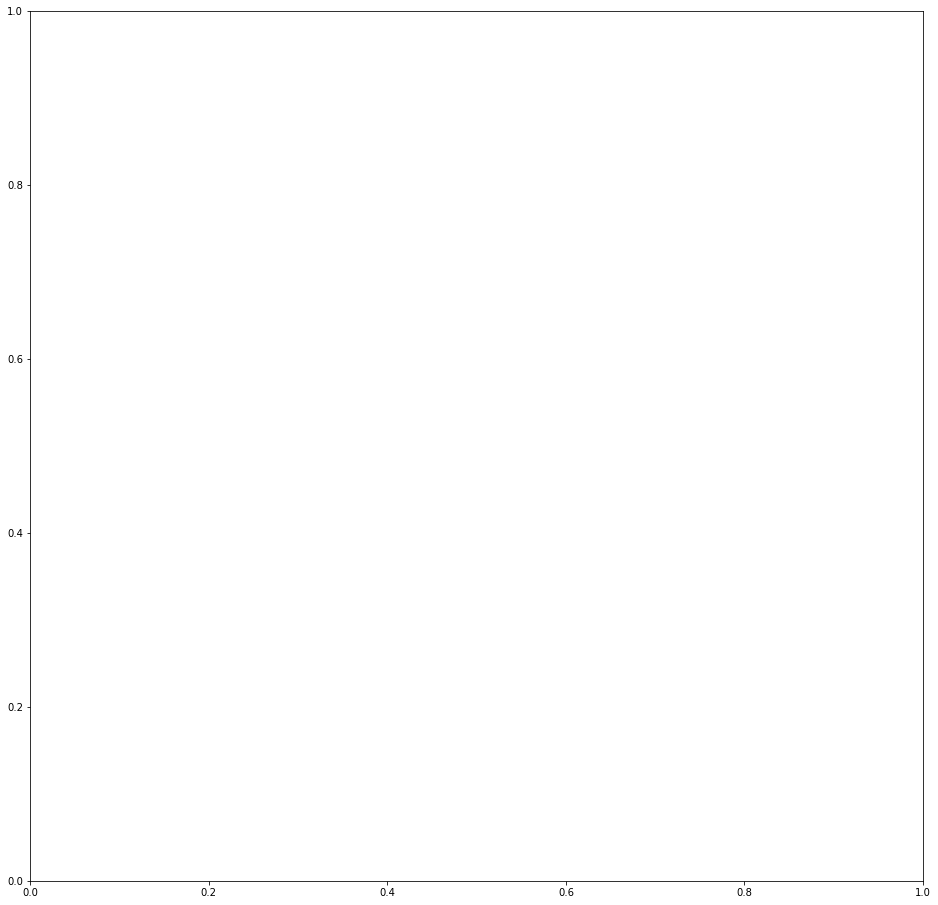

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16,16))
county.plot(ax=ax, color='darkgreen', alpha=0.2, linewidth=1)
city.plot(ax=ax, color='blue', alpha=0.2, linewidth=1)
county_stations.plot(ax=ax, color = 'red', alpha = 0.2, linewidth=1)
alt_fuel.plot(ax=ax, color = 'black', alpha = 0.2, linewidth=1)